In [102]:
import pandas as pd

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
import numpy as np

In [105]:
from sklearn.feature_extraction import DictVectorizer

In [106]:
df = pd.read_parquet('fhv_tripdata_2021-01.parquet')

In [107]:
df

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037
...,...,...,...,...,...,...,...
1154107,B03266,2021-01-31 23:43:03,2021-01-31 23:51:48,7.0,7.0,None,B03266
1154108,B03284,2021-01-31 23:50:27,2021-02-01 00:48:03,44.0,91.0,None,
1154109,B03285,2021-01-31 23:13:46,2021-01-31 23:29:58,171.0,171.0,None,B03285
1154110,B03285,2021-01-31 23:58:03,2021-02-01 00:17:29,15.0,15.0,None,B03285


In [108]:
df.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [109]:
df['duration'] = df.dropOff_datetime - df.pickup_datetime

In [110]:
df.duration.dt.total_seconds()

0          1020.0
1          1020.0
2          6600.0
3           497.0
4           913.0
            ...  
1154107     525.0
1154108    3456.0
1154109     972.0
1154110    1166.0
1154111    2160.0
Name: duration, Length: 1154112, dtype: float64

In [ ]:
df

In [ ]:
# lambda is used to apply every element on column

In [64]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [65]:
df.duration.mean()

19.1672240937939

In [ ]:
df.duration

In [ ]:
df.duration.describe()

In [ ]:
# plt.boxplot(df.duration)
# fig = plt.figure(figsize =(10, 7))
# plt.show()


In [ ]:
# # finding the 1st quartile
# q1 = np.quantile(df.duration, 0.25)

# # finding the 3rd quartile
# q3 = np.quantile(df.duration, 0.75)
# med = np.median(df.duration)

# # finding the iqr region
# iqr = q3-q1

# # finding upper and lower whiskers
# upper_bound = q3+(1.5*iqr)
# lower_bound = q1-(1.5*iqr)
# print(iqr, upper_bound, lower_bound)


In [ ]:
# outliers = df.duration[(df.duration <= lower_bound) | (df.duration >= upper_bound)]
# print('The following are the outliers in the boxplot:')
# print('{}'.format(outliers))

In [ ]:
outliers.dtypes

In [ ]:
df.duration.mean()

In [66]:
# Check the distribution of the duration variable. There are some outliers. 

# Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

In [ ]:
df

In [ ]:
drop_records = 1154112 - 1109826
print('Dropped records are: ' + str(drop_records))

In [ ]:
count_nan_DOlocation = df.DOlocationID.isna().sum()
count_nan_PUlocation = df.PUlocationID.isna().sum()

In [ ]:
print('Count of NaN: ' + str(count_nan_DOlocation))
print('Count of NaN: ' + str(count_nan_PUlocation))

In [67]:
categorical = ['PUlocationID', 'DOlocationID']

df[categorical] = df[categorical].fillna(-1).astype('int')

In [68]:
df[categorical] = df[categorical].astype('str')

In [76]:
# turn the dataframe into a list of dictionaries
train_dicts = df[categorical].to_dict(orient="records")
train_dicts

[{'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '-1'},
 {'PUlocationID': '-1', 'DOlocationID': '72'},
 {'PUlocationID': '-1', 'DOlocationID': '61'},
 {'PUlocationID': '-1', 'DOlocationID': '71'},
 {'PUlocationID': '-1', 'DOlocationID': '91'},
 {'PUlocationID': '-1', 'DOlocationID': '39'},
 {'PUlocationID': '-1', 'DOlocationID': '37'},
 {'PUlocationID': '-1', 'DOlocationID': '39'},
 {'PUlocationID': '-1', 'DOlocationID': '72'},
 {'PUlocationID': '-1', 'DOlocationID': '72'},
 {'PUlocationID': '-1', 'DOlocationID': '89'},
 {'PUlocationID': '-1', 'DOlocationID': '177'},
 {'PUlocationID': '-1', 'DOlocationID': '225'},
 {'PUlocationID': '-1', 'DOlocationID': '63'},
 {'PUlocationID': '-1', 'DOlocationID': '67'},
 {'PUlocationID': '-1', 'DOlocationID': '22'},
 {'PUlocationID': '-1', 'DOlocationID': '61'},
 {'PUlocationID': '-1', 'DOlocationID': '14'},
 {'PUlocationID': '-1', 'DOlocationID': '14'},
 {'PUlocationID': '-1', 'DOlocationID': '188'},
 {'PUlocat

In [71]:
#Fit a dictionary vectorizer


In [72]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [73]:
X_train

<1109826x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2219652 stored elements in Compressed Sparse Row format>

In [74]:
# Get a feature matrix from it
X_train.shape

(1109826, 525)

In [81]:
len(dv.feature_names_)

525

In [ ]:
# how the column become 525? One hot encoding

In [80]:
Y_train = df.duration.values

In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
#model training
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [85]:
#apply model
y_pred = lr.predict(X_train)

In [86]:
from sklearn.metrics import mean_squared_error

In [88]:
mean_squared_error(Y_train, y_pred, squared=False)

10.528519107206316

In [91]:
categorical = ['PUlocationID', 'DOlocationID']
               
def read_data(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
               
    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()
               
    df[categorical] = df[categorical].fillna(-1).astype('int').astype(str)
    
    return df

In [92]:
df_val = read_data('fhv_tripdata_2021-02.parquet')

In [94]:
val_dicts = df_val[categorical].to_dict(orient="records")

In [96]:
X_val = dv.transform(val_dicts)

In [97]:
X_val.shape

(990113, 525)

In [98]:
#apply model
y_pred = lr.predict(X_val)

In [99]:
y_val = df_val.duration.values

In [100]:
mean_squared_error(y_val, y_pred, squared=False)

11.014283149347039

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/fadilrisdian/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


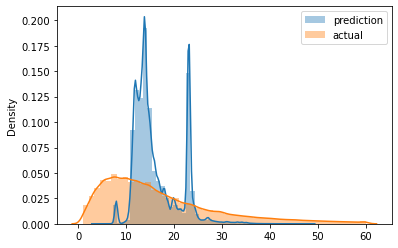

In [112]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()